## Feature Engineering

In [1]:
#import Libraries
import warnings
warnings.filterwarnings("ignore")
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
churn_data = pd.read_csv('data/churn_data_cleaned.csv')
churn_data1 = pd.read_csv('data/churn_data_cleaned1.csv')

In [3]:
churn_data.shape, churn_data1.shape

((2546918, 19), (2628715, 19))

In [4]:
churn_data.describe()

,customer_id,cnt_nov,cnt_dec,cnt_jan,cnt_feb,cnt_mar,cnt_apr,age,card,ussd,rib,newmobile,churn
count,2.546918e+06,2.546918e+06,2.546918e+06,2.546918e+06,2.546918e+06,2.546918e+06,2.546918e+06,2.546918e+06,2.546918e+06,2.546918e+06,2.546918e+06,2.546918e+06,2.546918e+06
mean,5.492916e+06,1.848164e+01,2.032305e+01,1.889062e+01,2.519264e+01,3.150812e+01,2.422316e+01,3.740582e+01,7.653167e-01,6.427266e-01,2.161071e-01,3.320460e-01,8.889450e-02
std,2.860384e+06,3.640958e+01,3.885592e+01,3.635145e+01,4.168790e+01,4.706654e+01,3.930220e+01,1.237128e+01,4.238008e-01,4.791964e-01,4.115882e-01,4.709475e-01,2.845915e-01
min,7.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.027656e+06,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.578155e+06,6.000000e+00,7.000000e+00,6.000000e+00,1.100000e+01,1.600000e+01,1.100000e+01,3.600000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.065909e+06,2.100000e+01,2.400000e+01,2.200000e+01,3.200000e+01,4.200000e+01,3.000000e+01,4.500000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.034453e+07,3.584000e+03,1.227300e+04,6.826000e+03,5.774000e+03,4.322000e+03,4.974000e+03,1.270000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546918 entries, 0 to 2546917
Data columns (total 19 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   customer_id       int64 
 1   cnt_nov           int64 
 2   cnt_dec           int64 
 3   cnt_jan           int64 
 4   cnt_feb           int64 
 5   cnt_mar           int64 
 6   cnt_apr           int64 
 7   region_name       object
 8   age               int64 
 9   customer_status   object
 10  sex               object
 11  customer_segment  object
 12  generation        object
 13  occupation        object
 14  card              int64 
 15  ussd              int64 
 16  rib               int64 
 17  newmobile         int64 
 18  churn             int64 
dtypes: int64(13), object(6)
memory usage: 369.2+ MB


### Feature Engineering

In [6]:
churn_data.head()

,customer_id,cnt_nov,cnt_dec,cnt_jan,cnt_feb,cnt_mar,cnt_apr,region_name,age,customer_status,sex,customer_segment,generation,occupation,card,ussd,rib,newmobile,churn
0,71,0,24,0,1,0,0,Lagos,45,Inactive,M,Churned Customer,Generation X,TRADER,1,0,0,1,1
1,112,8,1,14,22,3,0,Lagos,83,Inactive,M,Churned Customer,Retirees,TRADER,1,0,0,0,0
2,378,176,208,166,236,288,184,Abuja & North,70,Active,M,Normal Customer,Retirees,TRADER,1,0,1,1,0
3,465,29,19,23,35,59,38,Abuja & North,60,Active,M,Best Customer,Retirees,TRADER,0,1,0,0,0
4,532,45,9,16,18,45,20,Abuja & North,69,Active,M,Normal Customer,Retirees,BUSINESS,0,1,0,0,0


In [7]:
#Get new columns containing frequency
churn_data['customer_segment_freq'] = churn_data['customer_segment'].map(churn_data['customer_segment'].value_counts())
churn_data['generation_freq'] = churn_data['generation'].map(churn_data['generation'].value_counts())
churn_data['occupation_freq'] = churn_data['occupation'].map(churn_data['occupation'].value_counts())
churn_data['region_name_freq'] = churn_data['region_name'].map(churn_data['region_name'].value_counts())

churn_data1['customer_segment_freq'] = churn_data1['customer_segment'].map(churn_data1['customer_segment'].value_counts())
churn_data1['generation_freq'] = churn_data1['generation'].map(churn_data1['generation'].value_counts())
churn_data1['occupation_freq'] = churn_data1['occupation'].map(churn_data1['occupation'].value_counts())
churn_data1['region_name_freq'] = churn_data1['region_name'].map(churn_data1['region_name'].value_counts())

In [8]:
churn_data.head()

,customer_id,cnt_nov,cnt_dec,cnt_jan,cnt_feb,cnt_mar,cnt_apr,region_name,age,customer_status,...,occupation,card,ussd,rib,newmobile,churn,customer_segment_freq,generation_freq,occupation_freq,region_name_freq
0,71,0,24,0,1,0,0,Lagos,45,Inactive,...,TRADER,1,0,0,1,1,530530,575640,468611,532377
1,112,8,1,14,22,3,0,Lagos,83,Inactive,...,TRADER,1,0,0,0,0,530530,155530,468611,532377
2,378,176,208,166,236,288,184,Abuja & North,70,Active,...,TRADER,1,0,1,1,0,856550,155530,468611,897808
3,465,29,19,23,35,59,38,Abuja & North,60,Active,...,TRADER,0,1,0,0,0,435628,155530,468611,897808
4,532,45,9,16,18,45,20,Abuja & North,69,Active,...,BUSINESS,0,1,0,0,0,856550,155530,272198,897808


In [9]:
churn_data = pd.concat([churn_data,pd.get_dummies(churn_data['customer_status'])],axis=1)
churn_data1 = pd.concat([churn_data1,pd.get_dummies(churn_data1['customer_status'])],axis=1)

churn_data = pd.concat([churn_data,pd.get_dummies(churn_data['sex'])],axis=1)
churn_data1 = pd.concat([churn_data1,pd.get_dummies(churn_data1['sex'])],axis=1)

In [10]:
churn_data.head()

,customer_id,cnt_nov,cnt_dec,cnt_jan,cnt_feb,cnt_mar,cnt_apr,region_name,age,customer_status,...,churn,customer_segment_freq,generation_freq,occupation_freq,region_name_freq,Active,Inactive,F,M,O
0,71,0,24,0,1,0,0,Lagos,45,Inactive,...,1,530530,575640,468611,532377,0,1,0,1,0
1,112,8,1,14,22,3,0,Lagos,83,Inactive,...,0,530530,155530,468611,532377,0,1,0,1,0
2,378,176,208,166,236,288,184,Abuja & North,70,Active,...,0,856550,155530,468611,897808,1,0,0,1,0
3,465,29,19,23,35,59,38,Abuja & North,60,Active,...,0,435628,155530,468611,897808,1,0,0,1,0
4,532,45,9,16,18,45,20,Abuja & North,69,Active,...,0,856550,155530,272198,897808,1,0,0,1,0


In [11]:
churn_data.columns

Index(['customer_id', 'cnt_nov', 'cnt_dec', 'cnt_jan', 'cnt_feb', 'cnt_mar',
       'cnt_apr', 'region_name', 'age', 'customer_status', 'sex',
       'customer_segment', 'generation', 'occupation', 'card', 'ussd', 'rib',
       'newmobile', 'churn', 'customer_segment_freq', 'generation_freq',
       'occupation_freq', 'region_name_freq', 'Active', 'Inactive', 'F', 'M',
       'O'],
      dtype='object')

In [12]:
#drop irrelevant columns
churn_data.drop(columns=['customer_segment', 'generation', 'occupation', 'customer_status', 'sex', 'O', 'region_name', 'rib'],
                inplace=True)
churn_data1.drop(columns=['customer_segment', 'generation', 'occupation', 'customer_status', 'sex', 'O', 'region_name', 'rib'],
                inplace=True)

In [13]:
churn_data.head()

,customer_id,cnt_nov,cnt_dec,cnt_jan,cnt_feb,cnt_mar,cnt_apr,age,card,ussd,newmobile,churn,customer_segment_freq,generation_freq,occupation_freq,region_name_freq,Active,Inactive,F,M
0,71,0,24,0,1,0,0,45,1,0,1,1,530530,575640,468611,532377,0,1,0,1
1,112,8,1,14,22,3,0,83,1,0,0,0,530530,155530,468611,532377,0,1,0,1
2,378,176,208,166,236,288,184,70,1,0,1,0,856550,155530,468611,897808,1,0,0,1
3,465,29,19,23,35,59,38,60,0,1,0,0,435628,155530,468611,897808,1,0,0,1
4,532,45,9,16,18,45,20,69,0,1,0,0,856550,155530,272198,897808,1,0,0,1


In [14]:
churn_copy = churn_data.copy()
churn_copy1 = churn_data1.copy()

In [15]:
churn_data = churn_copy.copy()
churn_data1 = churn_copy1.copy()

In [16]:
churn_data.rename(columns={'cnt_nov':'mnth1', 'cnt_dec':'mnth2', 'cnt_jan':'mnth3', 'cnt_feb':'mnth4', 'cnt_mar':'mnth5',
                  'cnt_apr':'mnth6'}, inplace=True)
churn_data1.rename(columns={'cnt_nov':'mnth1', 'cnt_dec':'mnth2', 'cnt_jan':'mnth3', 'cnt_feb':'mnth4', 'cnt_mar':'mnth5',
                  'cnt_apr':'mnth6'}, inplace=True)

In [17]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546918 entries, 0 to 2546917
Data columns (total 20 columns):
 #   Column                 Dtype
---  ------                 -----
 0   customer_id            int64
 1   mnth1                  int64
 2   mnth2                  int64
 3   mnth3                  int64
 4   mnth4                  int64
 5   mnth5                  int64
 6   mnth6                  int64
 7   age                    int64
 8   card                   int64
 9   ussd                   int64
 10  newmobile              int64
 11  churn                  int64
 12  customer_segment_freq  int64
 13  generation_freq        int64
 14  occupation_freq        int64
 15  region_name_freq       int64
 16  Active                 uint8
 17  Inactive               uint8
 18  F                      uint8
 19  M                      uint8
dtypes: int64(16), uint8(4)
memory usage: 320.6 MB


In [18]:
import statistics
def avg_5_mnths_txn(*mnths):
    x = statistics.mean(mnths)
    return x

In [19]:
def stdev_5_mnths_txn(*mnths):
    x = statistics.stdev(mnths)
    return x

In [20]:
#Get feature for average 5 months transaction count
churn_data['avg_5mnths_cnt'] = churn_data.apply(lambda x: avg_5_mnths_txn(x['mnth1'], x['mnth2'], x['mnth3'], x['mnth4'],
                                                                          x['mnth5']), axis=1)
churn_data1['avg_5mnths_cnt'] = churn_data1.apply(lambda x: avg_5_mnths_txn(x['mnth1'], x['mnth2'], x['mnth3'], x['mnth4'],
                                                                            x['mnth5']), axis=1)

In [21]:
#Get feature for standard deviation for 5 months transaction count
churn_data['5mnths_cnt_std'] = churn_data.apply(lambda x: stdev_5_mnths_txn(x['mnth1'], x['mnth2'], x['mnth3'], x['mnth4'],
                                                                          x['mnth5']), axis=1)
churn_data1['5mnths_cnt_std'] = churn_data1.apply(lambda x: stdev_5_mnths_txn(x['mnth1'], x['mnth2'], x['mnth3'], x['mnth4'],
                                                                            x['mnth5']), axis=1)

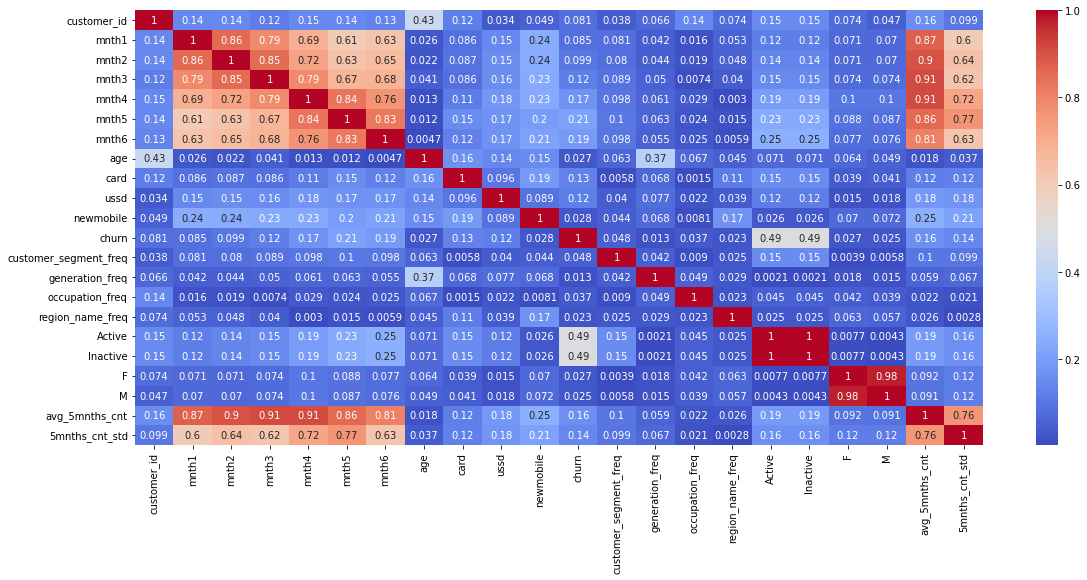

In [22]:
plt.figure(figsize=(19, 8))
sns.heatmap(churn_data.corr().abs(), annot=True, cmap='coolwarm');

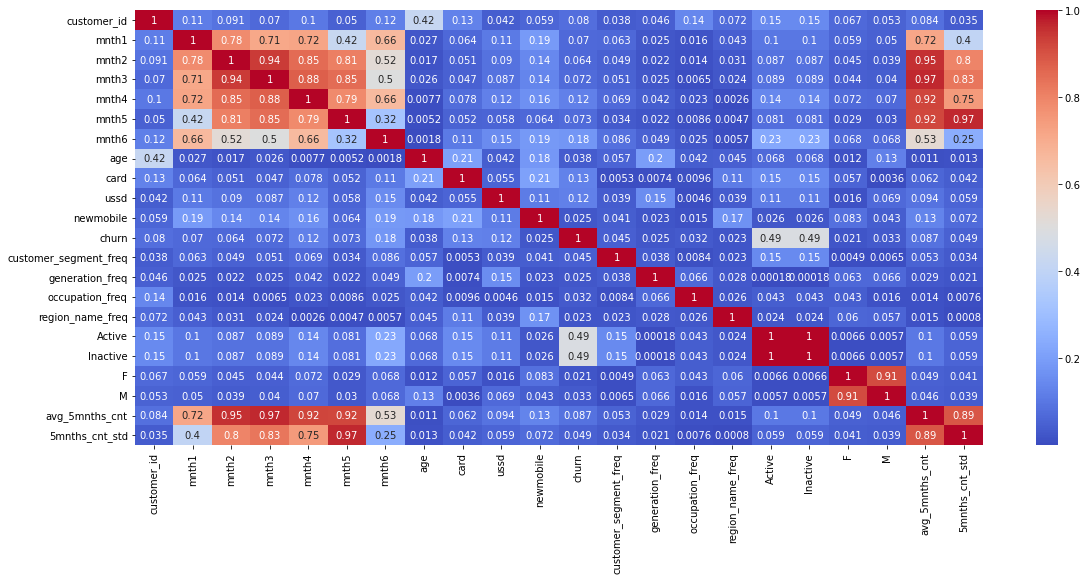

In [23]:
plt.figure(figsize=(19, 8))
sns.heatmap(churn_data1.corr().abs(), annot=True, cmap='coolwarm');

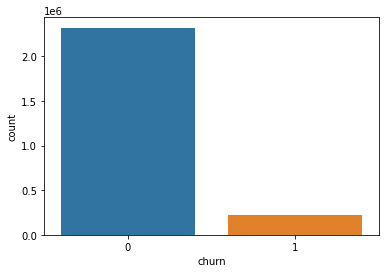

In [24]:
sns.countplot('churn', data=churn_data);

In [25]:
churn_data.to_csv('data/churn_data_fe.csv', index=False)
churn_data1.to_csv('data/churn_data_fe1.csv', index=False)

### INFERENCE

In [26]:
inf = pd.read_csv('data/inf_cleaned.csv')
inf1 = pd.read_csv('data/inf_cleaned1.csv')

In [27]:
inf.shape, inf1.shape

((2571098, 19), (2652644, 19))

In [28]:
#Get new columns containing frequency
inf['customer_segment_freq'] = inf['customer_segment'].map(inf['customer_segment'].value_counts())
inf['generation_freq'] = inf['generation'].map(inf['generation'].value_counts())
inf['occupation_freq'] = inf['occupation'].map(inf['occupation'].value_counts())
inf['region_name_freq'] = inf['region_name'].map(inf['region_name'].value_counts())

inf1['customer_segment_freq'] = inf1['customer_segment'].map(inf1['customer_segment'].value_counts())
inf1['generation_freq'] = inf1['generation'].map(inf1['generation'].value_counts())
inf1['occupation_freq'] = inf1['occupation'].map(inf1['occupation'].value_counts())
inf1['region_name_freq'] = inf1['region_name'].map(inf1['region_name'].value_counts())

In [29]:
inf.head()

,customer_id,mnth1,mnth2,mnth3,mnth4,mnth5,mnth6,region_name,age,customer_status,...,occupation,card,ussd,rib,newmobile,churn,customer_segment_freq,generation_freq,occupation_freq,region_name_freq
0,4541699,30,32,0,0,0,0,South South & South East,28,Inactive,...,ARTISANS,1,0,1,1,1,532541,706392,176042,736767
1,4541724,35,14,4,0,0,0,South West,32,Inactive,...,TRADER,1,0,0,0,1,532541,1123941,487284,349029
2,4541743,9,20,17,14,26,16,Abuja & North,28,Active,...,STUDENT,1,1,0,0,0,867829,706392,340892,900394
3,4541760,0,14,0,3,0,0,Abuja & North,38,Inactive,...,GOVERNMENT,1,0,0,0,1,532541,1123941,528735,900394
4,4541763,10,8,4,6,4,3,Abuja & North,37,Active,...,ARTISANS,1,1,0,0,0,867829,1123941,176042,900394


In [30]:
inf.columns

Index(['customer_id', 'mnth1', 'mnth2', 'mnth3', 'mnth4', 'mnth5', 'mnth6',
       'region_name', 'age', 'customer_status', 'sex', 'customer_segment',
       'generation', 'occupation', 'card', 'ussd', 'rib', 'newmobile', 'churn',
       'customer_segment_freq', 'generation_freq', 'occupation_freq',
       'region_name_freq'],
      dtype='object')

In [31]:
inf = pd.concat([inf,pd.get_dummies(inf['customer_status'])],axis=1)
inf = pd.concat([inf,pd.get_dummies(inf['sex'])],axis=1)

inf1 = pd.concat([inf1,pd.get_dummies(inf1['customer_status'])],axis=1)
inf1 = pd.concat([inf1,pd.get_dummies(inf1['sex'])],axis=1)

In [32]:
#drop irrelevant columns
inf.drop(columns=['customer_segment', 'generation', 'occupation', 'customer_status', 'sex', 'O', 'region_name', 'rib'],
                inplace=True)
inf1.drop(columns=['customer_segment', 'generation', 'occupation', 'customer_status', 'sex', 'O', 'region_name', 'rib'],
                inplace=True)

In [33]:
inf.head()

,customer_id,mnth1,mnth2,mnth3,mnth4,mnth5,mnth6,age,card,ussd,newmobile,churn,customer_segment_freq,generation_freq,occupation_freq,region_name_freq,Active,Inactive,F,M
0,4541699,30,32,0,0,0,0,28,1,0,1,1,532541,706392,176042,736767,0,1,1,0
1,4541724,35,14,4,0,0,0,32,1,0,0,1,532541,1123941,487284,349029,0,1,0,1
2,4541743,9,20,17,14,26,16,28,1,1,0,0,867829,706392,340892,900394,1,0,1,0
3,4541760,0,14,0,3,0,0,38,1,0,0,1,532541,1123941,528735,900394,0,1,0,1
4,4541763,10,8,4,6,4,3,37,1,1,0,0,867829,1123941,176042,900394,1,0,0,1


In [34]:
#Get feature for average 5 months transaction count
inf['avg_5mnths_cnt'] = inf.apply(lambda x: avg_5_mnths_txn(x['mnth1'], x['mnth2'], x['mnth3'], x['mnth4'], x['mnth5']), axis=1)
inf1['avg_5mnths_cnt'] = inf1.apply(lambda x: avg_5_mnths_txn(x['mnth1'], x['mnth2'], x['mnth3'], x['mnth4'], x['mnth5']), axis=1)

In [35]:
#Get feature for standard deviation for 5 months transaction count
inf['5mnths_cnt_std'] = inf.apply(lambda x: stdev_5_mnths_txn(x['mnth1'], x['mnth2'], x['mnth3'], x['mnth4'],
                                                                          x['mnth5']), axis=1)
inf1['5mnths_cnt_std'] = inf1.apply(lambda x: stdev_5_mnths_txn(x['mnth1'], x['mnth2'], x['mnth3'], x['mnth4'],
                                                                            x['mnth5']), axis=1)

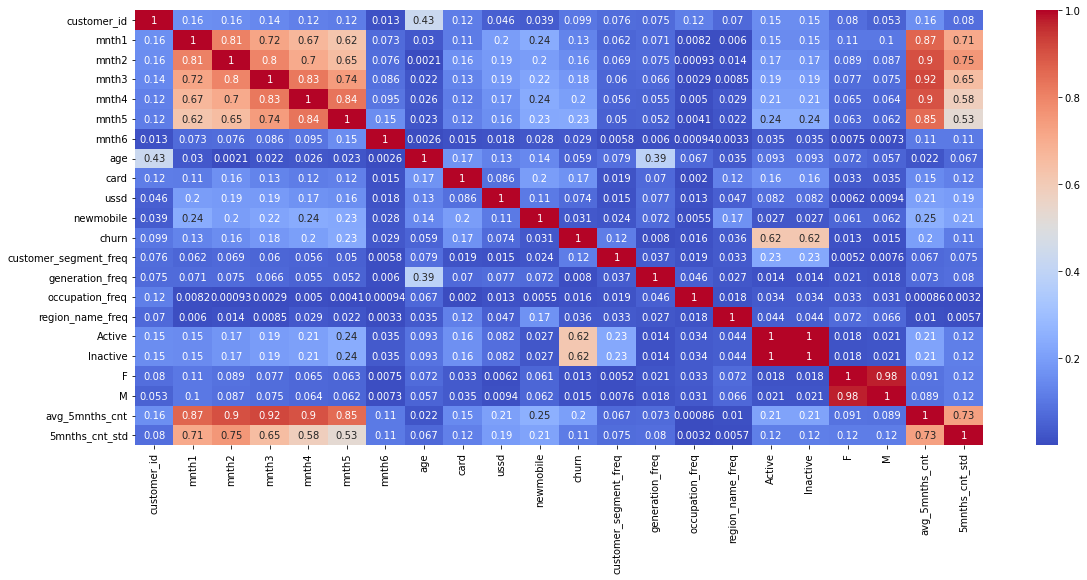

In [36]:
plt.figure(figsize=(19, 8))
sns.heatmap(inf.corr().abs(), annot=True, cmap='coolwarm');

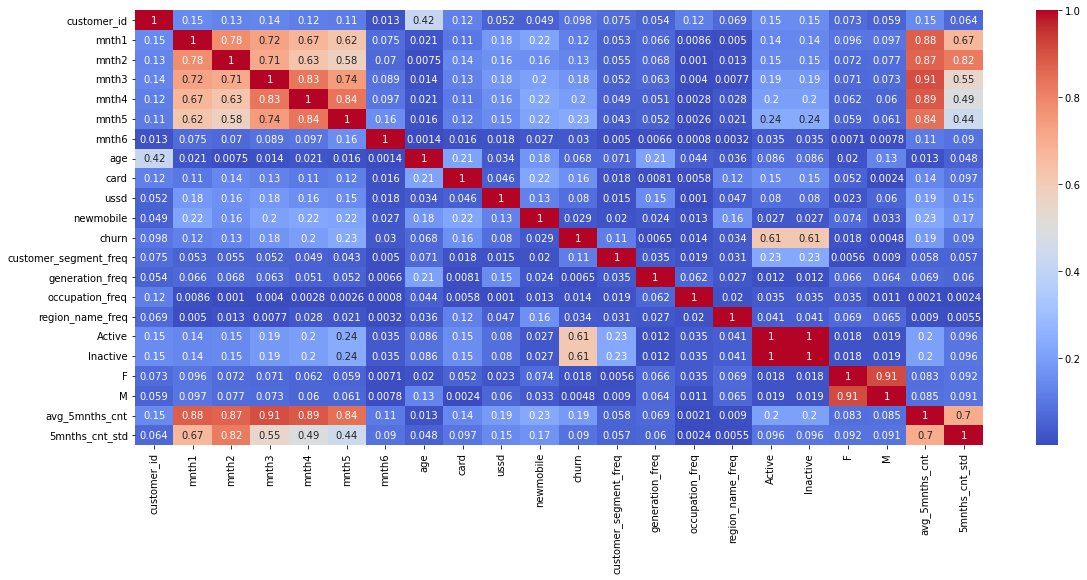

In [37]:
plt.figure(figsize=(19, 8))
sns.heatmap(inf1.corr().abs(), annot=True, cmap='coolwarm');

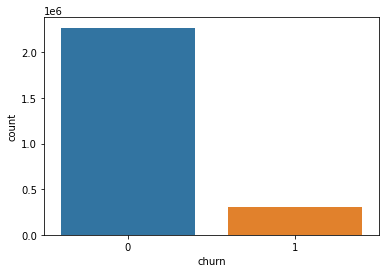

In [38]:
sns.countplot('churn', data=inf);

In [39]:
inf.to_csv('data/inf_fe.csv', index=False)
inf1.to_csv('data/inf_fe1.csv', index=False)